In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL2/'

#sys.path.append("codes/modules") # add custom Vibe 's modules
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
#########################################

In [2]:
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

import xarray as xr
import pandas as pd
sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

No joblib
no cmocean


In [3]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'             # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=True)                                    # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative

first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
runid	= 'Arc12'

data_path  = '/scratch/usr/hbkoziel/'+runid+'/netcdf_monthly/'

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [4]:
ind_all = np.load('index_all.npy')
ind_all

array([191974, 191973, 191975, ..., 711906, 711930, 711931])

In [5]:
tracername = 'eke'
time = pd.date_range('1985-01-01', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracername+'*.nc', concat_dim='time')
data['time'] = time

print 'loading data...'
EKE_sel = data.eke.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
EKE_sel = EKE_sel.compute()
print 'loading done'

# EKE_march = EKE_sel[data['time.month']==3]
# EKE_march = EKE_march.compute()
# EKE_march_mean = EKE_sel[data['time.month']==3].mean(dim='time')
# EKE_march_mean = EKE_march_mean.compute()

print 'deriving statistics...'
EKE = EKE_sel.resample(time="1A").mean(dim='time')
EKE_mean = EKE.mean(dim='time')
EKE_mean = EKE_mean.compute()
print np.shape(EKE_mean)
print np.shape(EKE)
pff = np.polyfit(years, EKE, 1)
EKE_trend = pff[0]
print 'done'

loading data...
loading done
deriving statistics...
(16950142,)
(31, 16950142)
done


In [6]:
tracername = 'cur50m'
time = pd.date_range('1985-01-01', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracername+'*.nc', concat_dim='time')
data['time'] = time

print 'loading data...'
CUR_sel = data.cur50m.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
CUR_sel = CUR_sel.compute()

CUR = CUR_sel.resample(time="1A").mean(dim='time')
CUR = CUR.compute()

CUR_mean = CUR.mean(dim='time')
CUR_mean = CUR_mean.compute()
print np.shape(CUR_mean)
print np.shape(CUR)
print 'deriving statistics...'
pff = np.polyfit(years, CUR, 1)
CUR_trend = pff[0]
print 'done'

loading data...
(753179,)
(31, 753179)
deriving statistics...
done


In [7]:
pff = np.polyfit(years, CUR, 1)
CUR_trend = pff[0]
print np.shape(CUR_trend)

(753179,)


For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in greater_equal


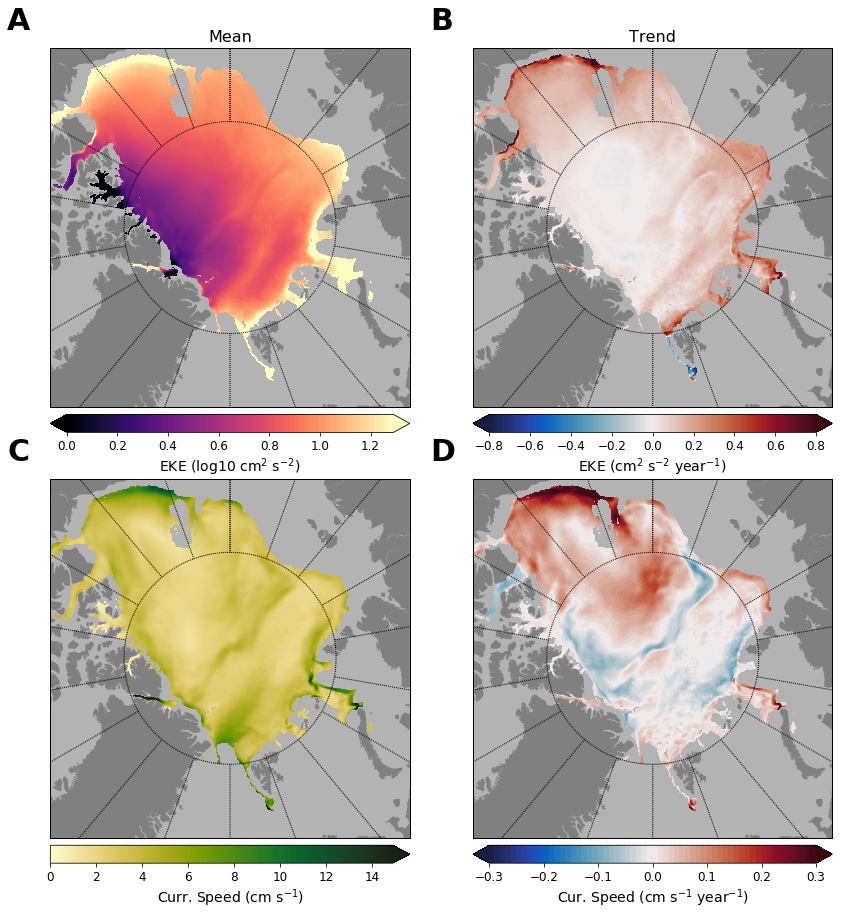

In [9]:
import pyfesom as pf
fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

EKE_mean[EKE_mean == 0] = np.nan
data = np.empty(np.shape(EKE_mean))
data[:] = np.nan
data[ind_all]=EKE_mean[ind_all]
data, elem_no_nan = pf.get_data(data,mesh,0)
ax1      = fig.add_subplot(221)
contours = np.arange(0, 1.3, .01)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, np.log10(data) , levels=contours, cmap=cm.magma, extend='both')
label = 'EKE (log10 cm$^{2}$ s$^{-2}$)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=np.arange(0,1.4,.2))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('Mean', fontsize=16)

EKE_trend[EKE_trend == 0] = np.nan
data = np.empty(np.shape(EKE_trend))
data[:] = np.nan
data[ind_all]=EKE_trend[ind_all]
data2, elem_no_nan = pf.get_data(data,mesh,0) 
ax2      = fig.add_subplot(222)
contours = np.arange(-.8, .81, .01)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'EKE (cm$^{2}$ s$^{-2}$ year$^{-1}$)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=np.arange(-.8, .81, .2))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('Trend', fontsize=16)

CUR_mean[CUR_mean == 0] = np.nan
data = np.empty(np.shape(CUR_mean))
data[:] = np.nan
data[ind_all]=CUR_mean[ind_all]
data, elem_no_nan = pf.get_data(data*100,mesh,0)
ax3      = fig.add_subplot(223)
contours = np.arange(0, 15, .1)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, data , levels=contours, cmap=cmap.cm.speed, extend='max')
label = 'Curr. Speed (cm s$^{-1}$)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=np.arange(0, 15, 2))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

CUR_trend[CUR_trend == 0] = np.nan
data = np.empty(np.shape(CUR_trend))
data[:] = np.nan
data[ind_all]=CUR_trend[ind_all]
data2, elem_no_nan = pf.get_data(data*100,mesh,0) 
ax4      = fig.add_subplot(224)
contours = np.arange(-.3, .31, .01)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'Cur. Speed (cm s$^{-1}$ year$^{-1}$)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=np.arange(-.3, .31, .1))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

ax1.text(-0.12, 1.05, 'A', transform=ax1.transAxes,
            size=30, weight='bold')
ax2.text(-0.12, 1.05, 'B', transform=ax2.transAxes,
            size=30, weight='bold')
ax3.text(-0.12, 1.05, 'C', transform=ax3.transAxes,
            size=30, weight='bold')
ax4.text(-0.12, 1.05, 'D', transform=ax4.transAxes,
            size=30, weight='bold')

fig.subplots_adjust(wspace=0.02,hspace=0.12)

plt.savefig(save_path+'map_ekecurr.png', dpi = 300, bbox_inches='tight') 